In [526]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [527]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

In [528]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
scipy: 0.19.1
numpy: 1.13.3
matplotlib: 2.1.0
pandas: 0.20.3
sklearn: 0.19.0


In [529]:
# import some data to play with
#iris = datasets.load_iris()
colName=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
dataset_1 = pandas.read_table(data_url, names = colName, sep=',', engine='python')
dataset_1.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,class
40,5.0,3.5,1.3,0.3,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
0,5.1,3.5,1.4,0.2,Iris-setosa
55,5.7,2.8,4.5,1.3,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
85,6.0,3.4,4.5,1.6,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor


In [530]:
dataset_1.shape

(150, 5)

In [531]:
dataset = dataset_1.copy()

In [532]:
# Load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#dataset = pandas.read_csv(url, names=names)

In [533]:
# head
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [534]:
# head
print(dataset.tail(10))

     sepal-length  sepal-width  petal-length  petal-width           class
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica
143           6.8          3.2           5.9          2.3  Iris-virginica
144           6.7          3.3           5.7          2.5  Iris-virginica
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [535]:
# shape
print(dataset.shape)

(150, 5)


In [536]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [537]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


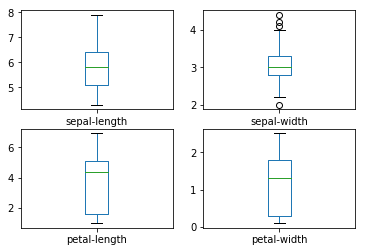

In [538]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

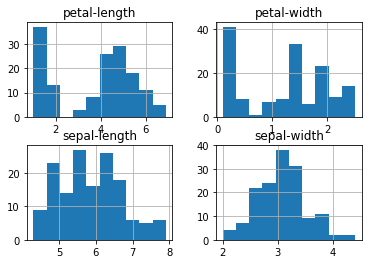

In [539]:
# histograms
dataset.hist()
plt.show()

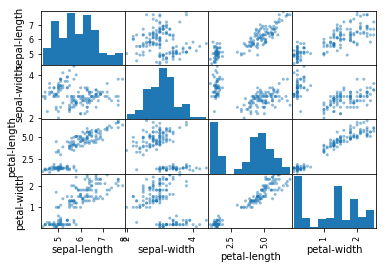

In [540]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [541]:
print(dataset.isnull().sum())

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64


In [542]:
if (dataset['sepal-length'].isnull().sum() > 0) == True :
    dataset['sepal-length'] = dataset['sepal-length'].replace(0, dataset['sepal-length'].median())
else:
    dataset['sepal-length'] = dataset['sepal-length']

In [543]:
if (dataset['sepal-width'].isnull().sum() > 0) == True :
    dataset['sepal-width'] = dataset['sepal-width'].replace(0, dataset['sepal-width'].median())
else:
    dataset['sepal-width'] = dataset['sepal-width']

In [544]:
if (dataset['petal-length'].isnull().sum() > 0) == True :
    dataset['petal-length'] = dataset['petal-length'].replace(0, dataset['petal-length'].median())
else:
    dataset['petal-length'] = dataset['petal-length']

In [545]:
if (dataset['petal-width'].isnull().sum() > 0) == True :
    dataset['petal-width'] = dataset['petal-width'].replace(0, dataset['petal-width'].median())
else:
    dataset['petal-width'] = dataset['petal-width']

#### Since there is no missing value, hence no need missing value treatment but still for safer side we wrote above codes for handling missing values 

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [546]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [547]:
dataset.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [548]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [549]:
import numpy as np
dataset['class'] = np.where(dataset['class'] == 'Iris-setosa', 0,dataset['class'])

In [550]:
dataset['class'] = np.where(dataset['class'] == 'Iris-versicolor', 1,dataset['class'])

In [551]:
dataset['class'] = np.where(dataset['class'] == 'Iris-virginica', 2,dataset['class'])

In [552]:
dataset.groupby("class").count()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


In [553]:
dataset.groupby("class").mean()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [554]:
dataset.groupby("class").median()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
0,5.0,3.4,1.50,0.2
1,5.9,2.8,4.35,1.3
2,6.5,3.0,5.55,2.0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [555]:
dataset.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


In [556]:
dataset['sepal-length'].corr(dataset['petal-length'])

0.87175415730487182

In [557]:
dataset['sepal-length'].corr(dataset['petal-width'])

0.8179536333691636

In [558]:
dataset['sepal-length'].corr(dataset['sepal-width'])

-0.10936924995064937

In [559]:
# Here we saw that the correlation among sepal-length and petal-length is ver high 
# and the correlation among sepal-length and petal-width is ver high 
# so it is better to keep petal-width or petal-length in our analysis
#so we can drop one out of this two

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [560]:
import statistics as st

In [561]:
st.variance(dataset['sepal-length'])

0.68569351230425057

In [562]:
st.variance(dataset['sepal-width'])

0.18800402684563758

In [563]:
st.variance(dataset['petal-length'])

3.1131794183445192

In [564]:
st.variance(dataset['petal-width'])

0.58241431767337803

In [565]:
a = dataset.drop("class" , axis=1)
a = a.drop("petal-length", axis=1)

b = dataset.pop("class")

In [566]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each a, calculate VIF and save in dataframe
vif = pandas.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif["features"] = a.columns

In [567]:
# For each a, calculate VIF and save in dataframe
vif = pandas.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif["features"] = a.columns

In [568]:
vif.round(1)

,VIF Factor,features
0,94.0,sepal-length
1,53.0,sepal-width
2,11.7,petal-width


In [569]:
#Lets drop one more veriable and see the effect on vif
a = a.drop("sepal-length", axis=1)

In [570]:
# For each a, calculate VIF and save in dataframe
vif = pandas.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif["features"] = a.columns

In [571]:
vif.round(1)

,VIF Factor,features
0,2.9,sepal-width
1,2.9,petal-width


In [572]:
# by looking at the vif plot we should drop Sepal length and petel length column
# lets drop it and look at effect on model

In [573]:
#dataset = dataset_1.copy()

             class  count      prop
0  Iris-versicolor     50  0.333333
1      Iris-setosa     50  0.333333
2   Iris-virginica     50  0.333333


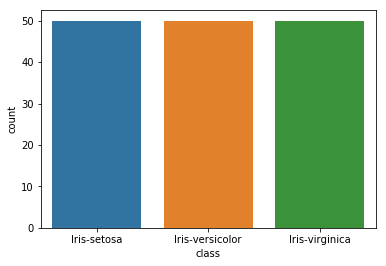

In [574]:
## Target Variable Frequency Distribution
freq = dataset_1['class'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
import seaborn as sns
sns.countplot(y)

## Question 6

*Plot the scatter matrix for all the variables.*

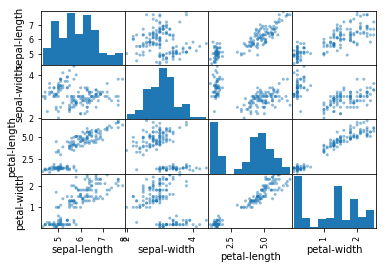

In [575]:
# scatter plot matrix
scatter_matrix(dataset_1)
plt.show()

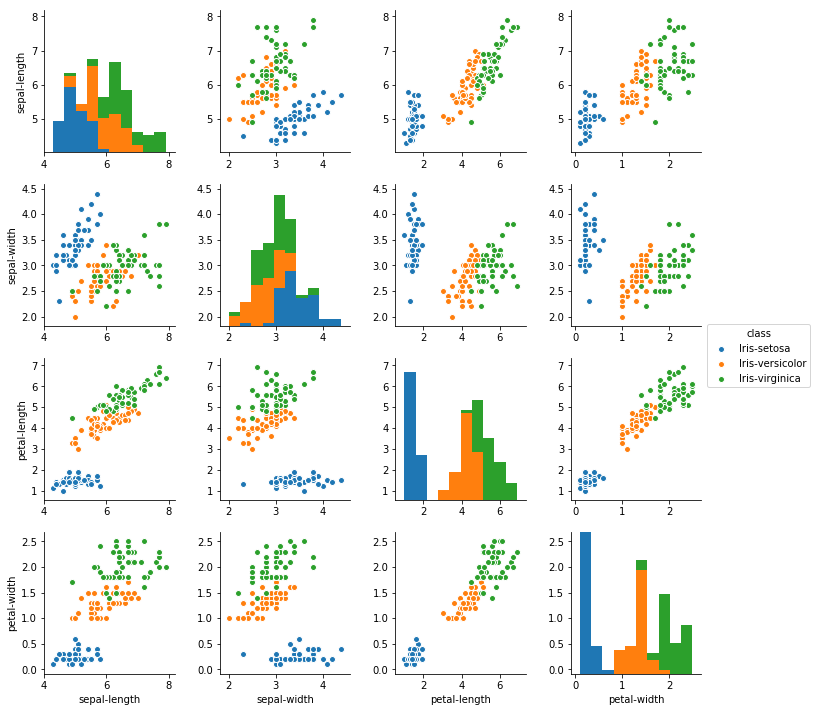

In [576]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(dataset_1, hue="class")
plt.show()

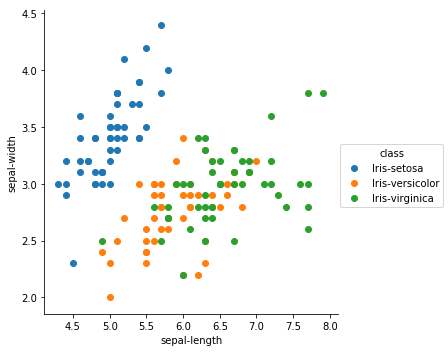

In [577]:
# Modify the graph above by assigning each species an individual color.
sns.FacetGrid(dataset_1, hue="class", size=5) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend()
plt.show()

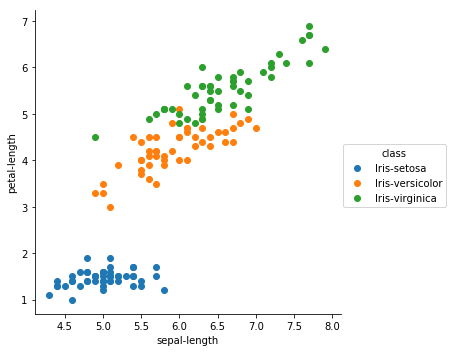

In [578]:
# Modify the graph above by assigning each species an individual color.
sns.FacetGrid(dataset_1, hue="class", size=5) \
   .map(plt.scatter, "sepal-length", "petal-length") \
   .add_legend()
plt.show()

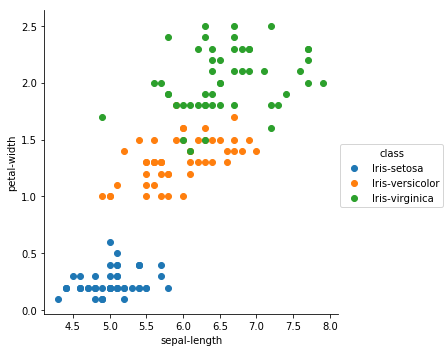

In [579]:
# Modify the graph above by assigning each species an individual color.
sns.FacetGrid(dataset_1, hue="class", size=5) \
   .map(plt.scatter, "sepal-length", "petal-width") \
   .add_legend()
plt.show()

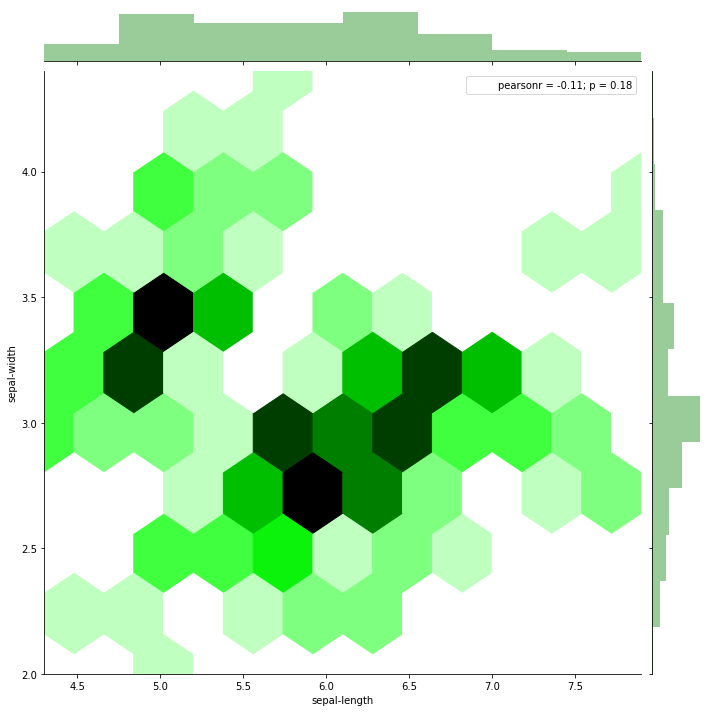

In [580]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
sns.jointplot(x="sepal-length", y="sepal-width", data=dataset_1, size=10,ratio=10, kind='hex',color='green')
plt.show()

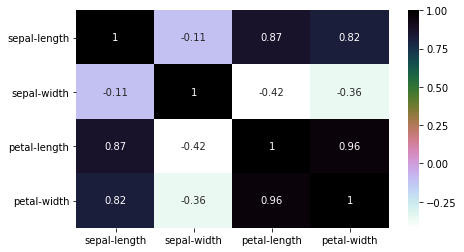

In [581]:
plt.figure(figsize=(7,4)) 
sns.heatmap(dataset_1.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [583]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.2, random_state = 0)

In [584]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [590]:
#X_train, X_test, y_train, y_test
print('X_train.shape = ', X_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_train.shape = ', y_train.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (120, 2)
X_test.shape =  (30, 2)
y_train.shape =  (120,)
y_test.shape =  (30,)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [591]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [592]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.31622776601683794
RMSE value for k=  2 is: 0.22360679774997896
RMSE value for k=  3 is: 0.2018433569398328
RMSE value for k=  4 is: 0.19895560643855537
RMSE value for k=  5 is: 0.2
RMSE value for k=  6 is: 0.2018433569398328
RMSE value for k=  7 is: 0.19863479632965914
RMSE value for k=  8 is: 0.17529736639968857
RMSE value for k=  9 is: 0.1745069479909592
RMSE value for k=  10 is: 0.17888543819998318
RMSE value for k=  11 is: 0.17799000188592015
RMSE value for k=  12 is: 0.17808133805360674
RMSE value for k=  13 is: 0.18149064994037323
RMSE value for k=  14 is: 0.18117154647377903
RMSE value for k=  15 is: 0.18378731669453627
RMSE value for k=  16 is: 0.18784690131416418
RMSE value for k=  17 is: 0.17970885078258197
RMSE value for k=  18 is: 0.18425693279752223
RMSE value for k=  19 is: 0.1883004612631402
RMSE value for k=  20 is: 0.1930025906561878


Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [593]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.31622776601683794
RMSE value for k=  2 is: 0.22360679774997896
RMSE value for k=  3 is: 0.2018433569398328
RMSE value for k=  4 is: 0.19895560643855537
RMSE value for k=  5 is: 0.2
RMSE value for k=  6 is: 0.2018433569398328
RMSE value for k=  7 is: 0.19863479632965914
RMSE value for k=  8 is: 0.17529736639968857
RMSE value for k=  9 is: 0.1745069479909592
RMSE value for k=  10 is: 0.17888543819998318
RMSE value for k=  11 is: 0.17799000188592015
RMSE value for k=  12 is: 0.17808133805360674
RMSE value for k=  13 is: 0.18149064994037323
RMSE value for k=  14 is: 0.18117154647377903
RMSE value for k=  15 is: 0.18378731669453627
RMSE value for k=  16 is: 0.18784690131416418
RMSE value for k=  17 is: 0.17970885078258197
RMSE value for k=  18 is: 0.18425693279752223
RMSE value for k=  19 is: 0.1883004612631402
RMSE value for k=  20 is: 0.1930025906561878


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

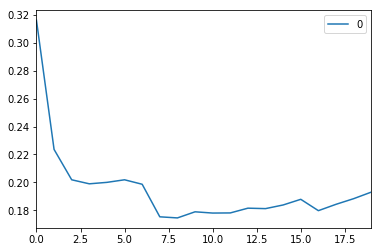

In [594]:
#plotting the rmse values against k values
curve = pandas.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [595]:
# we can take k = 6 and run the model

In [596]:
dataset = dataset_1.copy()

In [597]:
X = dataset.drop("class" , axis=1)
X = X.drop("sepal-length", axis=1)
X = X.drop("petal-length", axis=1)

y = dataset.pop("class")

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [598]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pandas.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [599]:
vif.round(1)

,VIF Factor,features
0,2.9,sepal-width
1,2.9,petal-width


In [600]:
#X_train, X_test, y_train, y_test
print('X_train.shape = ', X_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_train.shape = ', y_train.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (120, 2)
X_test.shape =  (30, 2)
y_train.shape =  (120,)
y_test.shape =  (30,)


In [601]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=3)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy (at K=3) is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy (at K=3) is 0.966666666667


In [602]:
Model = KNeighborsClassifier(n_neighbors=5)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy (at K=5) is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy (at K=5) is 0.966666666667


In [603]:
Model = KNeighborsClassifier(n_neighbors=9)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy (at K=9) is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy (at K=9) is 0.966666666667


In [604]:
Model = KNeighborsClassifier(n_neighbors=6)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy (at K=6) is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy (at K=6) is 0.966666666667


# Naive Bayes with Iris Data

In [605]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [606]:
dataset = dataset_1.copy()

In [607]:
X = dataset.drop("class" , axis=1)

y = dataset.pop("class")

In [608]:
#Check the dataset
print(y.head())
print(X.head())

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object
   sepal-length  sepal-width  petal-length  petal-width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

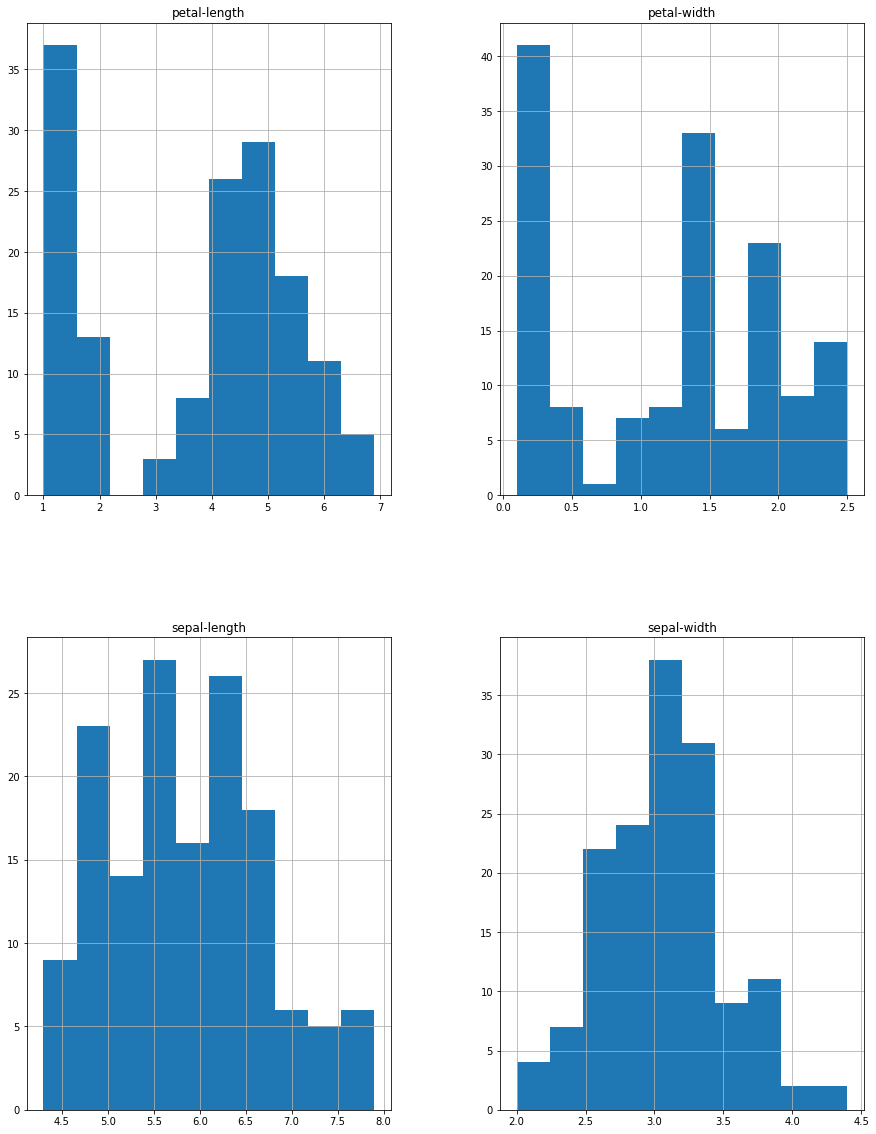

In [609]:
# histograms
dataset.hist(figsize=(15,20))
plt.figure()

In [610]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [611]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

### Split data in Training and test set in 80:20.

In [612]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Question 13 
Do Feature Scaling 

In [613]:
# Use StandardScaler or similar methods

In [614]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pandas.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pandas.DataFrame(x_test_scaled)

### Question 14 
Train and Fit NaiveBayes Model

In [617]:
#Fit the model
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.69      0.82        13
 Iris-virginica       0.60      1.00      0.75         6

    avg / total       0.92      0.87      0.87        30

[[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]
accuracy is 0.866666666667


In [619]:
#Predict
y_pred = Model.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [620]:
# show Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]


In [621]:
# show accuracy
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.866666666667


In [622]:
#Show precision and Recall metrics
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.69      0.82        13
 Iris-virginica       0.60      1.00      0.75         6

    avg / total       0.92      0.87      0.87        30



# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779